In [2]:
# import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn import linear_model

In [4]:
# Read data which is in the form of csv file

In [5]:
df2 = pd.read_csv("ag_market.csv",header=1)
df2.groupby("Market Name").count()

,Sl no.,District Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
Market Name,,,,,,,,,
Achnera,306,306,306,306,306,306,306,306,306
Agra,285,285,285,285,285,285,285,285,285
Fatehabad,258,258,258,258,258,258,258,258,258
Fatehpur Sikri,290,290,290,290,290,290,290,290,290
Jagnair,187,187,187,187,187,187,187,187,187
Jarar,146,146,146,146,146,146,146,146,146
Khairagarh,187,187,187,187,187,187,187,187,187
Samsabad,168,168,168,168,168,168,168,168,168


In [6]:
# Use describe function to get an idea of your data

In [7]:
df2.describe(include="all")

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
count,1827.000000,1827,1827,1827,1827,1827,1827.000000,1827.000000,1827.000000,1827
unique,NaN,1,8,1,4,1,NaN,NaN,NaN,365
top,NaN,Agra,Achnera,Potato,Desi,FAQ,NaN,NaN,NaN,27-Jun-20
freq,NaN,1827,306,1827,1367,1827,NaN,NaN,NaN,8
mean,914.000000,NaN,NaN,NaN,NaN,NaN,1392.799672,1521.559934,1474.332239,NaN
std,527.553789,NaN,NaN,NaN,NaN,NaN,562.382569,577.775389,555.645961,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,550.000000,NaN
25%,457.500000,NaN,NaN,NaN,NaN,NaN,1000.000000,1200.000000,1115.000000,NaN
50%,914.000000,NaN,NaN,NaN,NaN,NaN,1250.000000,1370.000000,1310.000000,NaN
75%,1370.500000,NaN,NaN,NaN,NaN,NaN,1690.000000,1810.000000,1780.000000,NaN


In [8]:
# Converting columns from Object to float data type so that we can apply Linear Regression

In [9]:
df2["Min Price (Rs./Quintal)"]=df2["Min Price (Rs./Quintal)"].astype(float)
df2["Max Price (Rs./Quintal)"]=df2["Max Price (Rs./Quintal)"].astype(float)
df2["Modal Price (Rs./Quintal)"]=df2["Modal Price (Rs./Quintal)"].astype(float)

In [10]:
#Converting "PriceDate" column into date format

In [11]:
df2["Price Date"]=pd.to_datetime(df2["Price Date"])
df2.head()
#pd.Timestamp(dt.datetime("Price Date"))

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-26


In [12]:
# Renaming columns

In [13]:
df2.rename(columns={"Min Price (Rs./Quintal)":"Min_price"},inplace=True)
df2.rename(columns={"Max Price (Rs./Quintal)":"Max_price"},inplace=True)
df2.rename(columns={"Modal Price (Rs./Quintal)":"Modal_price"},inplace=True)

In [14]:
# Detecting and removing outlier using percentile on Min_price column

In [15]:
max_threshold=df2["Min_price"].quantile(0.95)
min_threshold=df2["Min_price"].quantile(0.05)

In [16]:
df2[(df2["Min_price"]< max_threshold)&(df2["Min_price"] >min_threshold)]

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min_price,Max_price,Modal_price,Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
2,3,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
6,7,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-23
7,8,Agra,Achnera,Potato,Desi,FAQ,820.0,920.0,870.0,2020-12-22
10,11,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-19
...,...,...,...,...,...,...,...,...,...,...
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-06
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-05
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-04
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-02


In [17]:
## Detecting and removing outlier using percentile on Max_price column

In [18]:
max_threshold=df2["Max_price"].quantile(0.95)
min_threshold=df2["Max_price"].quantile(0.05)
df2[(df2["Max_price"]< max_threshold)&(df2["Max_price"] >min_threshold)]

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min_price,Max_price,Modal_price,Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
2,3,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
6,7,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-23
7,8,Agra,Achnera,Potato,Desi,FAQ,820.0,920.0,870.0,2020-12-22
10,11,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-19
...,...,...,...,...,...,...,...,...,...,...
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-06
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-05
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-04
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-02


In [19]:
 # Detecting and removing outlier using percentile on Modal_price column

In [20]:
max_threshold=df2["Modal_price"].quantile(0.95)
min_threshold=df2["Modal_price"].quantile(0.05)
df2[(df2["Modal_price"]< max_threshold)&(df2["Modal_price"] >min_threshold)]

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min_price,Max_price,Modal_price,Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
2,3,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
6,7,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-23
7,8,Agra,Achnera,Potato,Desi,FAQ,820.0,920.0,870.0,2020-12-22
10,11,Agra,Achnera,Potato,Desi,FAQ,950.0,1050.0,1000.0,2020-12-19
...,...,...,...,...,...,...,...,...,...,...
1822,1823,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-06
1823,1824,Agra,Samsabad,Potato,Local,FAQ,1000.0,1200.0,1100.0,2020-01-05
1824,1825,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-04
1825,1826,Agra,Samsabad,Potato,Local,FAQ,1100.0,1300.0,1200.0,2020-01-02


In [21]:
#Ploting boxplot to view Min_price with respect to market name

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

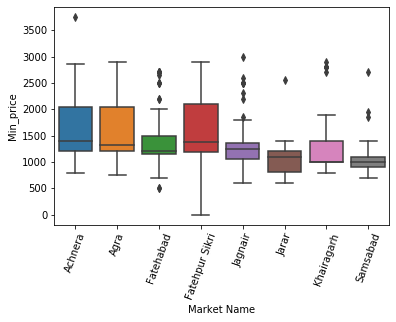

In [22]:
sns.boxplot(x="Market Name",y="Min_price",data=df2)
plt.xticks(rotation=70)

In [23]:
#Ploting boxplot to view Max_price with respect to market name

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

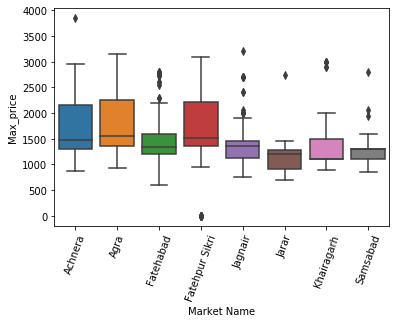

In [24]:
sns.boxplot(x="Market Name",y="Max_price",data=df2)
plt.xticks(rotation=70)

In [25]:
##Ploting boxplot to view Modal_price with respect to market name

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

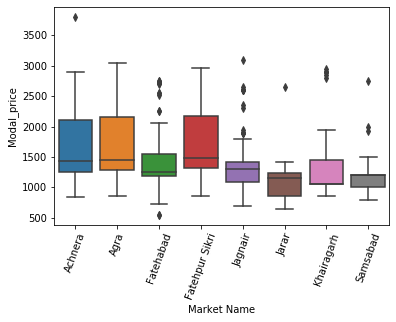

In [26]:
sns.boxplot(x="Market Name",y="Modal_price",data=df2)
plt.xticks(rotation=70)

In [ ]:
# barplot

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

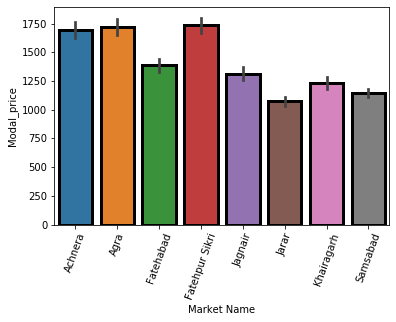

In [27]:
sns.barplot(x="Market Name",y="Modal_price",data=df2,
           lw=3,edgecolor="black")
plt.xticks(rotation=70)

In [28]:
# using get_dummies method to convert  "Market Name" column in form of 0 and 1 so that we 
#can use Linear Regressiom

In [29]:
dummies=pd.get_dummies(df2["Market Name"])
dummies.head()

,Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [30]:
# concatenating 2 datasets-dummies and df2 into one

In [31]:
merged=pd.concat([df2,dummies])
df2.head()

/Users/divitya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min_price,Max_price,Modal_price,Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900.0,1000.0,950.0,2020-12-30
1,2,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-29
2,3,Agra,Achnera,Potato,Desi,FAQ,850.0,950.0,900.0,2020-12-28
3,4,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-27
4,5,Agra,Achnera,Potato,Desi,FAQ,800.0,900.0,850.0,2020-12-26


In [32]:
# Relacing all Nan values with zero

In [33]:
merged.fillna(0,inplace=True)
merged[["Max_price","Min_price","Achnera","Agra", 
   "Fatehabad","Fatehpur Sikri","Jagnair","Jarar","Khairagarh","Samsabad"]]

,Max_price,Min_price,Achnera,Agra,Fatehabad,Fatehpur Sikri,Jagnair,Jarar,Khairagarh,Samsabad
0,1000.0,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,900.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,900.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,900.0,800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
# We use MinMaxScaler to normalize our features

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

In [36]:
scaling.fit_transform(merged[["Achnera","Agra","Fatehabad","Fatehpur Sikri","Jagnair",
                              "Jarar","Khairagarh","Samsabad","Min_price","Max_price"]])


array([[0.        , 0.        , 0.        , ..., 0.        , 0.24      ,
        0.25974026],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21333333,
        0.23376623],
       [0.        , 0.        , 0.        , ..., 0.        , 0.22666667,
        0.24675325],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [37]:
scaling.fit_transform(merged[["Modal_price"]])

array([[0.25      ],
       [0.22368421],
       [0.23684211],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [38]:
# Creating independent features

In [39]:
x=merged[["Max_price","Min_price","Achnera","Agra", "Fatehabad","Fatehpur Sikri",
          "Jagnair","Jarar","Khairagarh","Samsabad"]]

In [40]:
# Target varaible

In [41]:
y=merged["Modal_price"]

In [42]:
 # for splitting data to train and test partition
# Classifier for modelling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
# training model

In [46]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Predicting our model

In [48]:
model.predict(x_train)

array([1.28565118e+03, 5.11590770e-13, 5.11590770e-13, ...,
       1.19845089e+03, 5.11590770e-13, 5.96855898e-13])

In [49]:
# Model accuracy

In [50]:

model.score(x_test,y_test)

0.9845628157378923